In [1]:
from io import StringIO
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import topojson
import hkvportal
import io
import altair as alt
dp = hkvportal.Service('https://tsws.hkvservices.nl/mangrove.ws/', '236ebLIeCDdnKbfGe956IvZetIv1')

Dataservice is recognized. https://tsws.hkvservices.nl/mangrove.ws/entry.asmx?WSDL will be used as portal


In [2]:
string = "Lat;Lon;Title;Ministerie;Project;Locatie\n52,224061;5,771514;;Ministerie van Defensie;AOCS\/Kamp Nieuw Milligen;Kamp Nieuw Milligen, Meerveld, Netherlands\n50,8937;6,068266;;Ministerie van Defensie;APS Eygelshoven;Eygelshoven, Netherlands\n52,14177;5,345255;;Ministerie van Defensie;Bernhardkazerne;198D-DW Barchman Wuytierslaan, Amersfoort, Netherlands\n52,124407;5,273323;;Ministerie van Defensie;Camp New Amsterdam;Camp New Amsterdam, Huis ter Heide, Netherlands\n52,027665;5,869627;;Ministerie van Defensie;Cluster Schaarsbergen;Schaarsbergen, Netherlands\n52,10434;4,312698;;Ministerie van Defensie;Frederikkazerne;Frederikkazerne, The Hague, Netherlands\n51,506796;5,316709;;Ministerie van Defensie;Genm. De Ruyter van Stevenickkazerne;Oirschot, Netherlands\n50,936341;5,972782;;Ministerie van Defensie;HV Nassau Ouwerkerkkamp;5 Akerstraat, Brunssum, Netherlands\n52,779122;6,242758;;Ministerie van Defensie;Johannes Postkazenrne;Havelte, Netherlands\n53,001202;4,762978;;Ministerie van Defensie;Joost Dourleinkazerne;Joost Dourleinkazerne, Den Hoorn, Netherlands\n52,205651;5,927752;;Ministerie van Defensie;Koning Willem III Kazerne;Frankenlaan, Apeldoorn, Netherlands\n52,392733;5,912084;;Ministerie van Defensie;Legerplaats bij Olderboek;Legerplaats bij Oldebroek, 't Harde, Netherlands\n52,298179;5,65841;;Ministerie van Defensie;Legerplaats Ermelo;Legerplaats Ermelo, Ermelo, Netherlands\n52,124951;5,760447;;Ministerie van Defensie;Legerplaats Harskamp;Legerplaats Harskamp, Harskamp, Netherlands\n52,186824;5,691431;;Ministerie van Defensie;Legerplaats Stroe;Stroe, Netherlands\n52,135797;5,428444;;Ministerie van Defensie;Leusden;Leusden, Netherlands\n51,534572;5,854679;;Ministerie van Defensie;Luchthavenbesluit De Peel;1 Ripseweg, Vredepeel, Netherlands\n51,584054;4,924138;;Ministerie van Defensie;Luchthavenbesluit Gilze-Rijen;Gilze-Rijen, Rijen, Netherlands\n51,418796;4,340462;;Ministerie van Defensie;Luchthavenbesluit Woensdrecht;Woensdrecht, Netherlands\n51,519442;5,85923;;Ministerie van Defensie;Luitenant Generaal Bestkazerne;Luitenant-generaal Bestkazerne, Vredepeel, Netherlands\n52,40603;5,89716;;Ministerie van Defensie;Luitenant Kolonel Tonnetkazerne;Luitenant-kolonel Tonnetkazerne, 't Harde, Netherlands\n52,158342;4,492073;;Ministerie van Defensie;Marine Etablissement Amsterdam;Etablissement Einstein, Leiden, Netherlands\n51,459208;3,618506;;Ministerie van Defensie;Marine Kazerne Vlissingen;Vlissingen, Netherlands\n52,960141;4,737929;;Ministerie van Defensie;Marinekazerne Erfprins;Fort Erfprins, Den Helder, Netherlands\n;;;Ministerie van Defensie;Militaire oefenvlieggebieden;?\n53,040779;6,393889;;Ministerie van Defensie;MMC-Veenhuizen;Veenhuizen, Netherlands\n;;;Ministerie van Defensie;Nieuwe Haven;?\n;;;Ministerie van Defensie;Oefenterreinen-Defensie;?\n51,482686;5,340987;;Ministerie van Defensie;OT Oirschotse Heide;Verspreide huizen Zuid-Oirschotse Heide, Oirschot, Netherlands\n52,765042;4,658659;;Ministerie van Defensie;Petten KM;Petten, Netherlands\n52,124157;5,309955;;Ministerie van Defensie;Regio Soesterberg;Soesterberg, Netherlands\n51,395744;4,328997;;Ministerie van Defensie;Schietfaciliteit Ossendrecht;Ossendrecht, Netherlands\n52,67355;6,293895;;Ministerie van Defensie;USAG nic oost;Nic Oostinghweg, De Wijk, Netherlands\n52,922178;4,781179;;Ministerie van Defensie;Vliegbasis De Kooy;De Kooy, Den Helder, Netherlands\n51,452541;5,376337;;Ministerie van Defensie;Vliegbasis Eindhoven;Eindhoven Airport, Eindhoven, Netherlands\n51,568354;4,925511;;Ministerie van Defensie;Vliegbasis Gilze-Rijen;Vliegbasis Gilze-Rijen, Rijen, Netherlands\n53,226239;5,752203;;Ministerie van Defensie;Vliegbasis Leeuwarden;Vliegbasis Leeuwarden, Leeuwarden, Netherlands\n51,658611;5,702765;;Ministerie van Defensie;Vliegbasis Volkel;Vliegbasis Volkel, Volkel, Netherlands\n51,430203;4,348619;;Ministerie van Defensie;Vliegbasis Woensdrecht;Vliegbasis Woensdrecht, Hoogerheide, Netherlands\n53,016555;6,468887;;Ministerie van Defensie;Walaardt Sacre Kamp;Huis Ter Heide, Netherlands\n52,242929;6,306813;;Ministerie van Infrastructuur en Waterstaat ;A1 Apeldoorn - Azelo;A1, Bathmen, Netherlands\n51,952315;6,051491;;Ministerie van Infrastructuur en Waterstaat ;A12\/A15 Ressen - Oudbroeken (ViA15);BP A12 Oudbroeken, Duiven, Netherlands\n51,033989;5,823739;;Ministerie van Infrastructuur en Waterstaat ;A2 Het Vonderen - Kerensheide;A2, Born, Netherlands\n51,877478;4,967682;;Ministerie van Infrastructuur en Waterstaat ;A27 Houten - Hooipolder;A27, Hoogblokland, Netherlands\n52,103029;5,153583;;Ministerie van Infrastructuur en Waterstaat ;A27\/A12 Ring Utrecht;A27, Utrecht, Netherlands\n52,172857;5,425839;;Ministerie van Infrastructuur en Waterstaat ;A28\/A1 knooppunt Hoevelaken;A28, Amersfoort, Netherlands\n52,043546;4,348639;;Ministerie van Infrastructuur en Waterstaat ;A4 Passage Den Haag;A4, The Hague, Netherlands\n52,548496;5,513752;;Ministerie van Infrastructuur en Waterstaat ;A6 Almere Buiten-Oost - Lelystad;Lelystad Centrum - Swifterbant, Lelystad, Netherlands\n51,401507;6,107747;;Ministerie van Infrastructuur en Waterstaat ;A67\/A73 Knooppunt Zaarderheiken;Zaarderheiken, Blerick, Netherlands\n52,991897;5,152237;;Ministerie van Infrastructuur en Waterstaat ;Afsluitdijk;Afsluitdijk, Den Oever, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;Capaciteitsuitbreiding ligplaatsen Ijssel;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Deltaplan Zoetwater: Noordervaart;?\n52,08021;4,325601;;Ministerie van Infrastructuur en Waterstaat ;Den Haag CS, perronsporen 11 en 12;Den Haag Centraal, The Hague, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;European Rail Traffic Management System (ERTMS);?\n;;;Ministerie van Infrastructuur en Waterstaat ;Fietsparkeren bij stations;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Goederenroute Elst-Deventer-Twente (NaNOV);?\n;;;Ministerie van Infrastructuur en Waterstaat ;Grensoverschrijdend spoorvervoer;?\n52,45863;5,102502;;Ministerie van Infrastructuur en Waterstaat ;Hoogwaterbeschermingsprogramma Dijkversterking Marken;Marken, Netherlands\n52,460022;4,599433;;Ministerie van Infrastructuur en Waterstaat ;Hoogwaterbeschermingsprogramma: Ijmuiden;Ymuiden, Netherlands\n53,230032;4,909946;;Ministerie van Infrastructuur en Waterstaat ;Hoogwaterbeschermingsprogramma: Vlieland;Vlieland, Netherlands\n52,693611;5,280991;;Ministerie van Infrastructuur en Waterstaat ;Hoogwaterbeschermingsprogramma 2: Houtribdijk, onderdeel Trintelzand B\/watersportstrand;Houtribdijk, Enkhuizen, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;Kleine stations;?\n51,907676;5,996553;;Ministerie van Infrastructuur en Waterstaat ;Krib- en oeververlaging Pannerdensch Kanaal;Pannerdensch Kanaal, Pannerden, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;Kustlijnzorg;?\n52,309672;4,762127;;Ministerie van Infrastructuur en Waterstaat ;Luchthavenverkeersbesluit Schiphol;Schiphol Airport, Schiphol, Netherlands\n52,455736;5,52432;;Ministerie van Infrastructuur en Waterstaat ;Luchthavenbesluit Lelystad Airport;Lelystad Airport, Lelystad, Netherlands\n53,33077;6,06171;;Ministerie van Infrastructuur en Waterstaat ;Maaslijn (spoorwegproject);Oostrum, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;Maatregelenpakket HSL-Zuid;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Meer veilig (verbeteren verkeersveiligheid hoofdwegennet);?\n;;;Ministerie van Infrastructuur en Waterstaat ;Meerjarenprogramma Geluidsanering (MJPG);?\n;;;Ministerie van Infrastructuur en Waterstaat ;Meerjarenprogramma Ontsnippering (MJPO);?\n53,245241;6,876298;;Ministerie van Infrastructuur en Waterstaat ;N33 Zuidbroek - Appingedam;N33, Siddeburen, Netherlands\n52,3607;6,524794;;Ministerie van Infrastructuur en Waterstaat ;N35 Nijverdal - Wierden;2 Schapendijk, Notter, Netherlands\n52,555014;5,881369;;Ministerie van Infrastructuur en Waterstaat ;N50 Kampen - Kampen Zuid;N50, Kampen, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;Overwegenaanpak;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Plan van Aanpak Goederen Emplacementen (PAGE) Risicoreductie (verbeteren externe veiligheid rond spooremplacementen);?\n52,495245;4,756951;;Ministerie van Infrastructuur en Waterstaat ;Programma Hoogfrequent Spoorvervoer: Alkmaar - Amsterdam;Krommenie, Netherlands\n52,378908;4,901278;;Ministerie van Infrastructuur en Waterstaat ;Programma Hoogfrequent Spoorvervoer: Amsterdam Centraal;Amsterdam Centraal, Amsterdam, Netherlands\n51,564458;5,074477;;Ministerie van Infrastructuur en Waterstaat ;Programma Hoogfrequent Spoorvervoer: Eindhoven - Breda;Tilburg, Netherlands\n51,656378;5,291072;;Ministerie van Infrastructuur en Waterstaat ;Programma Hoogfrequent Spoorvervoer: Meteren - Boxtel;Van Miertstraat, Vught, Netherlands\n51,843041;5,85378;;Ministerie van Infrastructuur en Waterstaat ;Programma Hoogfrequent Spoorvervoer: Nijmegen;Stationsplein, Nymegen, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;Programma Emplacementen op orde;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Programma Kleine Functiewijzingen;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Programma Vervanging & Renovatie - Hoofdvaarwegen;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Programma Vervanging & Renovatie - Hoofdwatersysteem;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Programma Vervanging & Renovatie - Hoofdwegen;?\n51,497752;4,239225;;Ministerie van Infrastructuur en Waterstaat ;Rijksstructuurvisie Grevelingen en Volkerak - Zoommeer;Zoommeer\n51,534043;5,184314;;Ministerie van Infrastructuur en Waterstaat ;SmartwayZ.nl: InnovA58 (Eindhoven - Tilburg);A58, Moergestel, Netherlands\n51,536247;4,796284;;Ministerie van Infrastructuur en Waterstaat ;SmartwayZ.nl: InnovA58 (Sint-Annabosch - Galder);A58, Ulvenhout, Netherlands\n51,922369;4,409507;;Ministerie van Infrastructuur en Waterstaat ;Sporen Schiedam - Rotterdam;Parallelweg, Schiedam, Netherlands\n;;;Ministerie van Infrastructuur en Waterstaat ;Sporendriehoek Noord-Nederland;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Toegankelijkheid Stations;?\n;;;Ministerie van Infrastructuur en Waterstaat ;Verbeterprogramma Waterkwaliteit Rijkswateren (Kaderrichtlijn Water);?\n51,958333;3,983333;;Ministerie van Economische Zaken en Klimaat;Windpark Tweede Maasvlakte;?\n;;;Ministerie van Economische Zaken en Klimaat;Windparken Flevoland;?\n52,375473;3,455292;;Ministerie van Economische Zaken en Klimaat;Wind op Zee Hollandse Kust (west);\n52,755572;3,073453;;Ministerie van Economische Zaken en Klimaat;Wind op Zee Ijmuiden Ver kavels I en II;\n52,655156;3,068055;;Ministerie van Economische Zaken en Klimaat;Wind op Zee Ijmuiden Ver kavels III en IV;\n53,847798;5,534127;;Ministerie van Economische Zaken en Klimaat;Wind op Zee Ten Noorden Van De Wadden;\n52,633182;3,745837;;Ministerie van Economische Zaken en Klimaat;Net op Zee Hollandse Kust (noord) en (west Alpha);\n52,35112;3,453265;;Ministerie van Economische Zaken en Klimaat;Net op Zee Hollandse Kust (weta Beta);\n52,705572;3,071453;;Ministerie van Economische Zaken en Klimaat;Net op Zee Ijmuiden Ver Noord;\n52,605156;3,063055;;Ministerie van Economische Zaken en Klimaat;Net op Zee Ijmuiden Ver zuid;\n53,857798;5,534127;;Ministerie van Economische Zaken en Klimaat;Net op Zee Ten Noorden Van DE Wadden;\n;;;Ministerie van Economische Zaken en Klimaat;Hoogspanningsnet Zuid-West 380 kV oost;?\n;;;Ministerie van Economische Zaken en Klimaat;Gaswinning Noordzee;?\n;;;Ministerie van Economische Zaken en Klimaat;Gaswinning Waddenzee;?\n;;;Ministerie van Economische Zaken en Klimaat;14 gas-\/olieboringen offshore;?\n;;;Ministerie van Economische Zaken en Klimaat;18 gas-\/olieboringen op land;?\n;;;Ministerie van Economische Zaken en Klimaat;7 aardwarmte boringen op land;?\n;;;Ministerie van Economische Zaken en Klimaat;Revisievergunning zoutwinning;?\n;;;Ministerie van Economische Zaken en Klimaat;Onderhouds- en sluitingswerkzaamheden mijnbouwprojecten;?\n;;;Ministerie van Economische Zaken en Klimaat;CCS-infrastructuur Noordzee;?\n53,488774;6,084061;;Ministerie van Economische Zaken en Klimaat;Elektrificatie Ameland Westgat;Westgat\n;;;Ministerie van Landbouw Natuur en Voedselkwaliteit;Boomkorvisserij;?\n;;;Ministerie van Landbouw Natuur en Voedselkwaliteit;Garnalenvisserij;?\n;;;Ministerie van Landbouw Natuur en Voedselkwaliteit;Mosselzaadvisserij;?\n;;;Ministerie van Landbouw Natuur en Voedselkwaliteit;Spisulavisserij;?\n;;;Ministerie van Landbouw Natuur en Voedselkwaliteit;Zandwinning Noordzee;Op te zoeken?\n52,784695;4,680028;;Ministerie van Volksgezondheid, Welzijn en Sport;Pallas medische isotopenreactor;Petten, Netherlands\n52,079195;4,312242;;Ministerie van Binnenlandse Zaken en Koninkrijksrelaties \/ Rijksvastgoedbedrijf;Renovatie Binnenhof;Binnenhof, The Hague, Netherlands\n;;;Ministerie van Binnenlandse Zaken en Koninkrijksrelaties \/ Rijksvastgoedbedrijf;(Ver)bouw Rijkskantoren in o.a. Arnhem, Assen, Centrum Den Haag, Haarlem, Utrecht, Zwolle;?\n;;;Ministerie van Binnenlandse Zaken en Koninkrijksrelaties \/ Rijksvastgoedbedrijf;(Ver)bouw t.b.v. Rechtspraak in o.a. Almelo, Arnhem, Den Haag;?\n;;;Ministerie van Binnenlandse Zaken en Koninkrijksrelaties \/ Rijksvastgoedbedrijf;(Ver)bouw t.b.v. Penitentiaire inrichitngen o.a. te Alphen aan den Rijn, Balkburg, Scheveningen, Spijkenisse, Veenhuizen, Vught en Westzaan;?\n;;;Ministerie van Binnenlandse Zaken en Koninkrijksrelaties \/ Rijksvastgoedbedrijf;(Ver)bouw t.b.v. andere functies in o.a. in De Bilt, Ter Apel;?\n;;;Ministerie van Binnenlandse Zaken en Koninkrijksrelaties \/ Rijksvastgoedbedrijf;(Ver)bouw t.b.v. internationale organisaties in Den Haag;?\n;;;Ministerie van Binnenlandse Zaken en Koninkrijksrelaties \/ Rijksvastgoedbedrijf;Verkoop van diverse vastgoedobjecten met sloop\/herontwikkeling;"

In [3]:
def geom_string_to_gdf(string):
    
    DATA = StringIO(string)
    df = pd.read_csv(DATA, sep=";")
    df['Lat'] = pd.to_numeric(df['Lat'].str.replace(',','.'))
    df['Lon'] = pd.to_numeric(df['Lon'].str.replace(',','.'))    
    
    df.dropna(subset=['Lon', 'Lat'], inplace=True)
    geometry = [Point(xy) for xy in zip(df.Lon, df.Lat)]
    df = df.drop(['Lon', 'Lat'], axis=1)
    crs = {'init': 'epsg:4326'}
    gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)    
    
    return gdf

In [4]:
geomNL = geom_string_to_gdf(string)
geomNL.crs = {'init': 'epsg:4326'}
geomNL.head()

,Title,Ministerie,Project,Locatie,geometry
0,NaN,Ministerie van Defensie,AOCS\/Kamp Nieuw Milligen,"Kamp Nieuw Milligen, Meerveld, Netherlands",POINT (5.771514 52.224061)
1,NaN,Ministerie van Defensie,APS Eygelshoven,"Eygelshoven, Netherlands",POINT (6.068266 50.8937)
2,NaN,Ministerie van Defensie,Bernhardkazerne,"198D-DW Barchman Wuytierslaan, Amersfoort, Net...",POINT (5.345255 52.14177)
3,NaN,Ministerie van Defensie,Camp New Amsterdam,"Camp New Amsterdam, Huis ter Heide, Netherlands",POINT (5.273323 52.124407)
4,NaN,Ministerie van Defensie,Cluster Schaarsbergen,"Schaarsbergen, Netherlands",POINT (5.869626999999999 52.027665)


In [5]:
gdfNL = gpd.read_file('nl_no2_geojson_collection.geo.json')
gdfNL.columns = map(str.lower, gdfNL.columns) 
gdfNL = gdfNL.replace(to_replace= r'\\', value= '', regex=True)
gdfNL['ministerie'] = gdfNL['ministerie'].str.replace('/ ','')
gdfNL['ministerie'] = gdfNL['ministerie'].str.replace(' Rijksvastgoedbedrijf','')
gdfNL['ministerie'] = gdfNL['ministerie'].str.replace('Ministerie van Defensie','Def')
gdfNL['ministerie'] = gdfNL['ministerie'].str.replace('Ministerie van Infrastructuur en Waterstaat','I&W')
gdfNL['ministerie'] = gdfNL['ministerie'].str.replace('Ministerie van Economische Zaken en Klimaat','EZK')
gdfNL['ministerie'] = gdfNL['ministerie'].str.replace('Ministerie van Volksgezondheid, Welzijn en Sport','VWS')
gdfNL['ministerie'] = gdfNL['ministerie'].str.replace('Ministerie van Binnenlandse Zaken en Koninkrijksrelaties','BZK')

In [6]:
gdfNL.ministerie.unique()

array(['Def', 'EZK', 'I&W', 'VWS', 'BZK'], dtype=object)

In [7]:
dataNL = pd.merge(gdfNL, geomNL[['geometry', 'Locatie']], how='inner', left_on='locatie', right_on='Locatie', suffixes=('_x',''))
dataNL['lon'] = dataNL.geometry.x
dataNL['lat'] = dataNL.geometry.y
dataNL.drop(['Locatie', 'geometry_x', 'max', 'min','title','id'], axis=1, inplace=True)
dataNL.date = pd.to_datetime(dataNL.date).dt.strftime('%Y-%m')
dataNL.head()

,locatie,ministerie,project,date,median,geometry,lon,lat
0,"Kamp Nieuw Milligen, Meerveld, Netherlands",Def,AOCS/Kamp Nieuw Milligen,2018-07,0.000109,POINT (5.771514 52.224061),5.771514,52.224061
1,"Kamp Nieuw Milligen, Meerveld, Netherlands",Def,AOCS/Kamp Nieuw Milligen,2018-08,0.000107,POINT (5.771514 52.224061),5.771514,52.224061
2,"Kamp Nieuw Milligen, Meerveld, Netherlands",Def,AOCS/Kamp Nieuw Milligen,2018-09,0.000138,POINT (5.771514 52.224061),5.771514,52.224061
3,"Kamp Nieuw Milligen, Meerveld, Netherlands",Def,AOCS/Kamp Nieuw Milligen,2018-10,0.000112,POINT (5.771514 52.224061),5.771514,52.224061
4,"Kamp Nieuw Milligen, Meerveld, Netherlands",Def,AOCS/Kamp Nieuw Milligen,2018-11,0.000144,POINT (5.771514 52.224061),5.771514,52.224061


In [8]:
month_sorted = dataNL.date.unique().tolist()

In [9]:
from shapely.geometry.base import BaseMultipartGeometry
from shapely.geometry.polygon import orient as orient_
from shapely.geometry import Polygon

def orient(geom, sign=1.0):
    if isinstance(geom, BaseMultipartGeometry):
        return geom.__class__(
            list(
                map(
                    lambda geom: orient(geom, sign),
                    geom.geoms,
                )
            )
        )
    if isinstance(geom, (Polygon,)):
        return orient_(geom, sign)
    return geom

In [10]:
width = 300
height = 300

In [11]:
# remote geojson data object
url_geojson = 'https://raw.githubusercontent.com/cartomap/nl/master/wgs84/provincie_%7B2017%7D.geojson'
data_geojson_remote = alt.Data(url=url_geojson, format=alt.DataFormat(property='features',type='json'))

# chart object
provpltNL = alt.Chart(data_geojson_remote).mark_geoshape(stroke='black', fill='#F1F1F1',strokeWidth=1
).properties(
    width=width,
    height=height,
    projection={'type': 'conicConformal', 'rotate': [-20, 0.0], 'center':[-14.7, 52.1],'scale':5500, 'precision':0.1, 'translate':[width/2,height/2]}
)

In [12]:
#from shapely.ops import orient # version >=1.7a2
#dataNL.geometry = dataNL.geometry.apply(orient, args=(-1,))

In [53]:
datesNL = dataNL.date.unique()
dates_dropdownNL = alt.binding_select(options=datesNL.tolist())
dates_selectNL = alt.selection_single(empty='none', fields=['date'], bind=dates_dropdownNL, init={'date':datesNL[-1]}, name='month')
locatie_selectNL = alt.selection_single(empty='none', fields=['locatie'], init={'locatie':'Houtribdijk, Enkhuizen, Netherlands'}, on='mouseover', name='NLlocation')
locatie_date_highlightNL = alt.selection_single(empty='none', fields=['locatie', 'date'], on='mouseover', name='NLmonthlocation')

In [98]:
mappltNL = alt.Chart().mark_circle(opacity=0.9, stroke='black').encode(
    latitude="lat:Q",
    longitude="lon:Q",
    color=alt.Color('median',scale=alt.Scale(type='quantize', scheme=alt.SchemeParams('blueorange', count=5), domain=[0,0.00016]), legend=alt.Legend(title='NO₂ mol/m²', format='.1s')),
    tooltip=['date:O','locatie',alt.Tooltip('median', format='.4s'),'ministerie', 'project'],
    size=alt.Size('median',scale=alt.Scale(domain=[0,0.00016])),
    strokeWidth=alt.condition(locatie_selectNL, alt.StrokeWidthValue(2), alt.StrokeWidthValue(1))
).properties(
    width=width,
    height=height,
    projection={'type': 'conicConformal', 'rotate': [-20, 0.0], 'center':[-14.7, 52.1],'scale':5500, 'precision':0.1, 'translate':[width/2,height/2]}
).add_selection(
    dates_selectNL
).transform_filter(
    dates_selectNL
).add_selection(
    locatie_selectNL
)

In [99]:
titlepltNL = alt.Chart().mark_text(size=12).encode(
    text='date:O'
).add_selection(
    dates_selectNL
).transform_filter(
    dates_selectNL
)

In [100]:
boxpltNL = alt.Chart().mark_boxplot().encode(
    y=alt.Y('date:N', title=None, sort=month_sorted),
    x=alt.X('median:Q', title='NO₂ mol/m²', axis=alt.Axis(format='.2s'), scale=alt.Scale(domain=[0,0.00021])),
    color=alt.condition(dates_selectNL, alt.value('#FF9C33'), alt.value('#77B2D4')),
    tooltip=['date:O', 'locatie',alt.Tooltip('median', format='.4s'), 'ministerie', 'project']
).properties(
    width=width
).add_selection(
    dates_selectNL
)

In [101]:
circlepltNL = alt.Chart(dataNL).mark_point(stroke='black'
).encode(    
    y=alt.Y('date:N', axis=alt.Axis(labelAngle=0), title=None),
    x=alt.X('ministerie:N', title=None, axis=alt.Axis(labelLimit=300, labelAngle=-45)),
    size=alt.Size('mean(median):Q',
        scale=alt.Scale(range=[0, 500], type='symlog'),
        legend=alt.Legend(title='NO₂ mol/m²', format='.1s')
    ),
    fill=alt.Fill('mean(median):Q', scale=alt.Scale(type='quantize', scheme=alt.SchemeParams('blueorange', count=5), domain=[0,0.00016]), legend=None),
    tooltip=['date:N',alt.Tooltip('mean(median):Q', format='.4s'), 'ministerie'],
    strokeWidth=alt.condition(dates_selectNL, alt.StrokeWidthValue(2), alt.StrokeWidthValue(1)),
    fillOpacity=alt.FillOpacityValue(1)
).add_selection(
    dates_selectNL
).add_selection(
    locatie_date_highlightNL
)

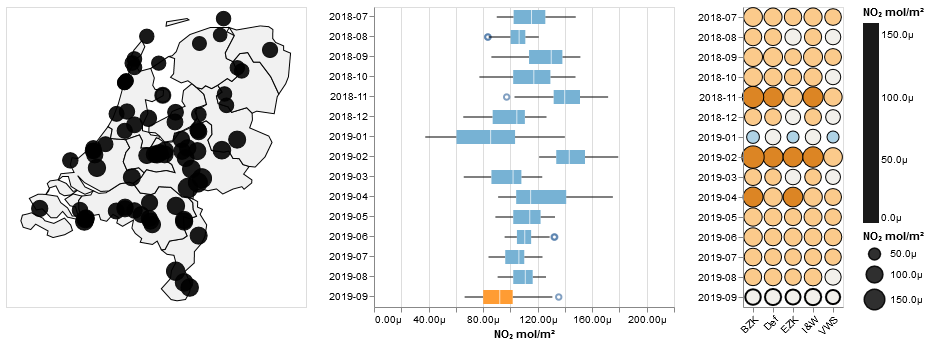

In [102]:
chartNL = alt.hconcat(alt.layer(provpltNL,mappltNL), boxpltNL, circlepltNL, data=dataNL)
chartNL

In [59]:
geomEU = gpd.read_file('europe_eea.shp')

In [60]:
gdfEU = gpd.read_file('NO2_EU_EEA_geojson_collection.geo.json', driver='GeoJSON')

In [61]:
gdfEU.head()

,id,continent,date,gdp_md_est,iso_a3,max,median,min,name,pop_est,geometry
0,0_0000000000000000000c,Asia,2018-07-01,29260.0,CYP,0.000095,0.000075,0.000073,Cyprus,1221549,None
1,0_00000000000000000000,Europe,2018-07-01,870800.0,NLD,0.000155,0.000108,0.000090,Netherlands,17084719,None
2,0_00000000000000000001,Europe,2018-07-01,297100.0,PRT,0.000096,0.000077,0.000073,Portugal,10839514,None
3,0_00000000000000000002,Europe,2018-07-01,1690000.0,ESP,0.000150,0.000078,0.000069,Spain,48958159,None
4,0_00000000000000000003,Europe,2018-07-01,322000.0,IRL,0.000093,0.000078,0.000070,Ireland,5011102,None


In [62]:
dataEU = pd.merge(gdfEU, geomEU[['geometry', 'name']], how='inner', on='name', suffixes=('_x',''))
dataEU.drop(['id', 'geometry_x', 'max', 'min','iso_a3','continent','pop_est','gdp_md_est'], axis=1, inplace=True)
dataEU.date = pd.to_datetime(dataEU.date).dt.strftime('%Y-%m')
dataEU.head()

,date,median,name,geometry
0,2018-07,0.000075,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
1,2018-08,0.000072,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
2,2018-09,0.000067,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
3,2018-10,0.000063,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
4,2018-11,0.000066,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."


In [63]:
from shapely.geometry.base import BaseMultipartGeometry
from shapely.geometry.polygon import orient as orient_
from shapely.geometry import Polygon

def orient(geom, sign=1.0):
    if isinstance(geom, BaseMultipartGeometry):
        return geom.__class__(
            list(
                map(
                    lambda geom: orient(geom, sign),
                    geom.geoms,
                )
            )
        )
    if isinstance(geom, (Polygon,)):
        return orient_(geom, sign)
    return geom

In [64]:
#from shapely.ops import orient # version >=1.7a2
dataEU.geometry = dataEU.geometry.apply(orient, args=(-1,))

In [25]:
dataEU.head()

,date,median,name,geometry
0,2018-07,0.000075,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
1,2018-08,0.000072,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
2,2018-09,0.000067,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
3,2018-10,0.000063,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."
4,2018-11,0.000066,Cyprus,"POLYGON ((32.73178022637745 35.14002594658844,..."


In [66]:
datesEU = dataEU.date.unique()
dates_dropdownEU = alt.binding_select(options=datesEU.tolist())
dates_selectEU = alt.selection_single(empty='none', fields=['date'], bind=dates_dropdownEU, init={'date':datesEU[-1]}, name='month')
country_selectEU = alt.selection_single(empty='none', fields=['name'], init={'name':'Netherlands'}, on='mouseover', name='EUlocation')
country_date_highlightEU = alt.selection_single(empty='none', fields=['name', 'date'], on='mouseover', name='EUmonthlocation')

In [67]:
width = 300
height = 300

mappltEU = alt.Chart().mark_geoshape(stroke='black').encode(
    color=alt.Color('median:Q', scale=alt.Scale(type='quantize', scheme=alt.SchemeParams('blueorange', count=5), domain=[0,0.00016]),legend=alt.Legend(title='NO₂ mol/m²', format='.1s')),
    tooltip=['date:O','name',alt.Tooltip('median', format='.4s')],
    strokeWidth=alt.condition(country_selectEU, alt.StrokeWidthValue(2), alt.StrokeWidthValue(1))
).properties(
    width=width,
    height=height,
    projection={'type': 'conicConformal', 'rotate': [-20, 0.0], 'center':[-11, 54.0],'scale':400, 'precision':0.1, 'translate':[width/2,height/2]}
).add_selection(
    dates_selectEU
).transform_filter(
    dates_selectEU
).add_selection(country_selectEU)

In [68]:
basepltEU = alt.Chart().mark_geoshape(stroke='black', fill='white',strokeWidth=1).encode(
).properties(
    width=width,
    height=height,
    projection={'type': 'conicConformal', 'rotate': [-20, 0.0], 'center':[-11, 54.0],'scale':400, 'precision':0.1, 'translate':[width/2,height/2]}
)

In [69]:
titlepltEU = alt.Chart().mark_text(size=12).encode(
    text='date:O'
).add_selection(
    dates_selectEU
).transform_filter(
    dates_selectEU
)

In [70]:
boxpltEU = alt.Chart().mark_boxplot().encode(
    y=alt.Y('date:O', title=None),
    x=alt.X('median:Q', title='NO₂ mol/m²', axis=alt.Axis(format='.1s'), scale=alt.Scale(domain=[0,0.00021])),
    color=alt.condition(dates_selectEU, alt.value('#FF9C33'), alt.value('#77B2D4')),
    tooltip=['date:O','name',alt.Tooltip('median', format='.4s')]
).properties(width=width
).add_selection(
    dates_selectEU
)

In [83]:
circlepltEU = alt.Chart().mark_circle(stroke='black'
).encode(    
    y=alt.Y('date:O', axis=alt.Axis(labelAngle=0), title=None),
    x=alt.X('name:N', title=None, axis=alt.Axis(labelAngle=-45)),
    size=alt.Size('median:Q',
        scale=alt.Scale(range=[0, 500], type='symlog'),
        legend=alt.Legend(title='NO₂ mol/m²', format='.1s')
    ),
    fill=alt.Fill('median:Q', scale=alt.Scale(type='quantize', scheme=alt.SchemeParams('blueorange', count=5), domain=[0,0.00016]), legend=None),
    tooltip=['date:O','name:N',alt.Tooltip('median', format='.4s')],
    strokeWidth=alt.condition({"selection": {"or": [dates_selectEU.name, country_selectEU.name]}}, alt.StrokeWidthValue(2), alt.StrokeWidthValue(1)),
    fillOpacity=alt.FillOpacityValue(1)
).add_selection(
    dates_selectEU,
    country_selectEU
)

In [84]:
chartEU = alt.hconcat(alt.vconcat(titlepltEU,alt.layer(basepltEU,mappltEU), boxpltEU),circlepltEU, data=dataEU)

In [85]:
chartNL = alt.hconcat(alt.layer(provpltNL,mappltNL), boxpltNL, circlepltNL, data=dataNL)

In [86]:
chartNL_EU = alt.vconcat(
    titlepltEU, 
    alt.vconcat(
        alt.hconcat(alt.layer(basepltEU,mappltEU), boxpltEU, circlepltEU, data=dataEU),
        alt.hconcat(alt.layer(provpltNL,mappltNL), boxpltNL, circlepltNL, data=dataNL),
        data=dataEU
    ),
    data=dataEU
)

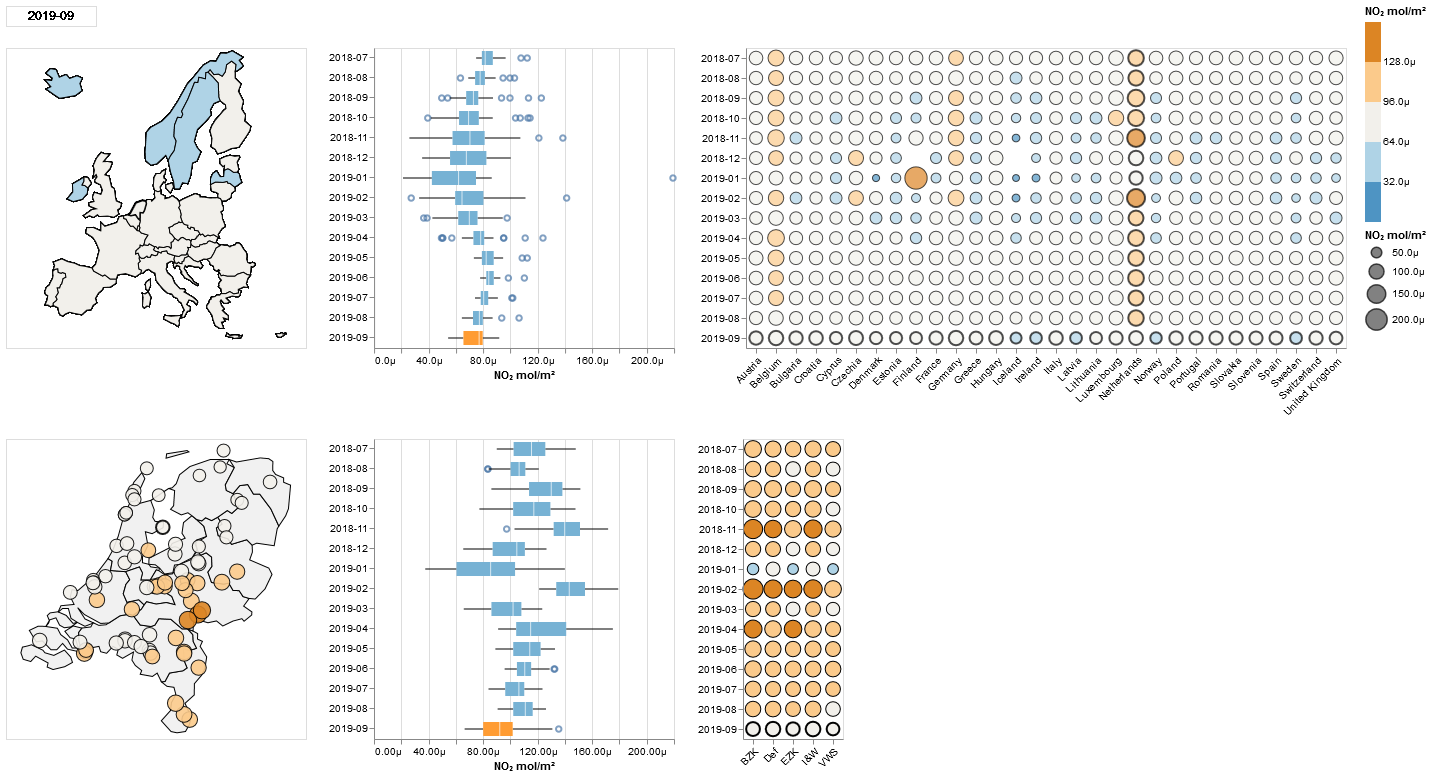

In [87]:
chartNL_EU

In [81]:
# export visualization as an 'in-memory text stream'
export_html = io.StringIO()
chartNL_EU.save(export_html, format='html')

In [ ]:
dp.new_entry(
    database='hoek',
    key='NL_EEA_NO2_TROPOMI',
    data=export_html,
    description='Maand aggregates NO2 voor EEA staten en NL locaties'
)

In [82]:
dp.update_entry(
    database='hoek',
    key='NL_EEA_NO2_TROPOMI',
    data=export_html,
    description='Maand aggregates NO2 voor EEA staten en NL locaties'
)

entry available at:
https://tsws.hkvservices.nl/mangrove.ws/data.ashx?function=dataportal.db.getdata&parameters={database:'hoek',key:'NL_EEA_NO2_TROPOMI'}&contentType=SET_BY_USER
